In [17]:
!pip install tmdbsimple
!pip install python-dateutil
!pip install ggplot
import numpy as np
from ggplot import *
import pandas as pd
import tmdbsimple as tmdb
import time
import datetime
from dateutil import parser
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.datasets as ds
import statsmodels.api as sm

    100% |████████████████████████████████| 2.2MB 100kB/s ta 0:00:01    75% |████████████████████████        | 1.7MB 142kB/s eta 0:00:04


In [3]:
tmdb.API_KEY = '0b6ab414e6fd79648a868782b0750b09'

In [4]:
tv = tmdb.TV(456) #Keep these cells as demo for tmdb api?
info = tv.info()

In [5]:
genres = info.get('genres')

In [6]:
for x in genres:
    print(x['name'])

Animation
Comedy


In [9]:
tv_id = 1
shows = []
ratings = []
genres = []
seasons = []
pops = []
episodes = []
ids = []

while (tv_id < 30000):
    tv = tmdb.TV(tv_id)
    time.sleep(.251)
    
    try:
        
        info = tv.info()
        name = info.get('name')
        season_no = info.get('number_of_seasons')
        episode = info.get('number_of_episodes')
        rating = info.get('vote_average')
        genre_s = info.get('genres')
        genre = ""
        pop = info.get('popularity')
        votes = info.get('vote_count')
        for x in genre_s:
            genre += x['name'] + "/"
        
        
        if votes >= 200 and season_no >= 4:
            shows.append(name)
            ids.append(tv_id)
            ratings.append(rating)
            genres.append(genre)
            episodes.append(episode)
            seasons.append(season_no)
            pops.append(pop)
            
    except:
        pass
    
    if tv_id == 5920: #account for some gaps in data
        tv_id = 8592
    elif tv_id == 8592:
        tv_id = 10283
    elif tv_id == 10545:
        tv_id = 17962
    else:
        tv_id += 1
    

KeyboardInterrupt: 

Scrape data from shows which are 4+ seasons long and 200+ user votes

In [10]:
print(shows)

['Top Gear', "That '70s Show", 'Buffy the Vampire Slayer', 'Weeds', 'Star Trek: Enterprise', 'The Simpsons', 'Futurama', 'Star Trek: The Next Generation', 'How I Met Your Mother', 'Mad Men', 'Californication', 'Six Feet Under', 'Breaking Bad', 'The Sopranos', 'Game of Thrones', 'Seinfeld', 'The Walking Dead', "Marvel's Agents of S.H.I.E.L.D.", 'Chuck', 'Dexter', 'Homeland', 'House', 'Sons of Anarchy', 'Person of Interest', 'Arrow', 'American Horror Story', 'Elementary', "Grey's Anatomy", 'The Big Bang Theory', 'Castle', 'New Girl', 'Modern Family', 'Ray Donovan', 'Orange Is the New Black', 'House of Cards', 'Luther', 'CSI: Crime Scene Investigation', 'American Dad!', 'Family Guy', 'The Wire', 'Boardwalk Empire', 'Supernatural', 'Heroes', 'Friends', 'Fringe', 'Star Trek: Voyager', 'The Fresh Prince of Bel-Air', 'Bones', 'Battlestar Galactica', '24', 'Malcolm in the Middle', 'South Park', 'Prison Break', 'Stargate Atlantis', 'The Office', 'The IT Crowd', 'Two and a Half Men', "It's Alway

In [11]:
print(len(shows))

75


In [12]:
print(tv_id)

26749


In [13]:
print(genres[0])

Documentary/Comedy/


In [14]:
print(len(genres))

75


In [15]:
with open("TVout.tsv", "a") as f:
        print ("%s\t%s\t%s\t%s\t%s\t%s\t%s" % ("show", "tv_id", "rating", "seasons", "episodes", "popularity", "genres"), file=f)

In [16]:
with open("TVout.tsv", "a") as f:
    for x in range(len(shows)):
        print ("%s\t%d\t%f\t%d\t%d\t%f\t%s" % (shows[x], ids[x], ratings[x], seasons[x], episodes[x], pops[x], genres[x]), file=f)

In [4]:
df1 = pd.DataFrame.from_csv("TVout.tsv", sep='\t')

Store all scaped data in tsv so we don't have to spend hours collecting again and import it as a dataframe

In [5]:
df1

,tv_id,rating,seasons,episodes,popularity,genres
show,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/
That '70s Show,52,7.3,8,200,27.289507,Comedy/
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/


In [15]:
five = df1[df1["seasons"] == 5]

In [16]:
five

,tv_id,rating,seasons,episodes,popularity,genres
show,,,,,,
Six Feet Under,1274,8.2,5,63,15.665654,Drama/
Breaking Bad,1396,8.2,5,62,45.275608,Drama/
Marvel's Agents of S.H.I.E.L.D.,1403,6.7,5,106,64.841267,Fantasy/Drama/Action/Adventure/Science Fiction/
Chuck,1404,7.5,5,91,15.665384,Action & Adventure/Comedy/Drama/
Person of Interest,1411,7.6,5,103,26.970550,Action/Adventure/Drama/Mystery/Thriller/
Elementary,1415,6.9,5,120,27.396723,Drama/Mystery/Crime/
Ray Donovan,1423,7.3,5,60,18.806580,Drama/
Orange Is the New Black,1424,7.4,5,65,21.535003,Comedy/Drama/
House of Cards,1425,8.1,5,65,32.350274,Drama/


In [33]:
season1 = []
season2 = []
season3 = []
season4 = []
season5 = []

for season_num in range(1,6):
    for tv_id in five["tv_id"]:
        season = tmdb.TV_Seasons(tv_id, season_num)
        time.sleep(.251)
        info = season.info()
        
        try:
            curr = 0
            episodes = info.get("episodes")
            num = 0
            for ep in episodes:
                if ep.get("vote_count") > 0:
                    curr += ep.get("vote_average")
                    num += 1
            avg = curr / num
            if season_num == 1:
                season1.append(avg)
            elif season_num == 2:
                season2.append(avg)
            elif season_num == 3:
                season3.append(avg)
            elif season_num == 4:
                season4.append(avg)
            else:
                season5.append(avg)
        except:
            pass

In [38]:
season5

[8.625,
 8.1523125,
 7.0,
 7.5673076923076925,
 8.87776923076923,
 5.733,
 7.875,
 7.5,
 6.493692307692308,
 8.9786,
 8.479125,
 9.097166666666666,
 7.5874444444444435,
 7.67075]

In [6]:
comedy = df1[df1["genres"] == "Comedy/"]

In [7]:
comedy

,tv_id,rating,seasons,episodes,popularity,genres
show,,,,,,
That '70s Show,52,7.3,8,200,27.289507,Comedy/
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/
Seinfeld,1400,8.2,9,193,27.224453,Comedy/
The Big Bang Theory,1418,6.9,11,254,220.309448,Comedy/
New Girl,1420,6.4,7,139,24.215878,Comedy/
Modern Family,1421,7.2,9,198,48.947379,Comedy/
Friends,1668,7.8,10,236,51.479031,Comedy/
The Fresh Prince of Bel-Air,1892,7.3,6,148,8.855756,Comedy/
Malcolm in the Middle,2004,7.4,7,151,15.092547,Comedy/


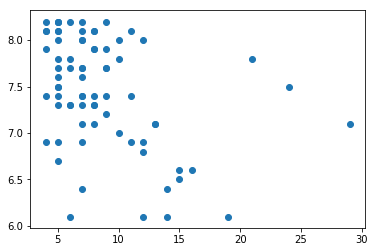

In [6]:
plt.scatter(df1.seasons, df1.rating)
plt.show()

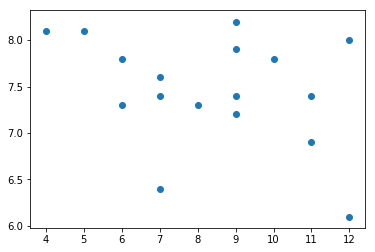

In [18]:
plt.scatter(comedy.seasons, comedy.rating)
plt.show()

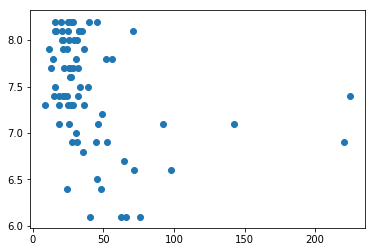

In [7]:
plt.scatter(df1.popularity, df1.rating)
plt.show()

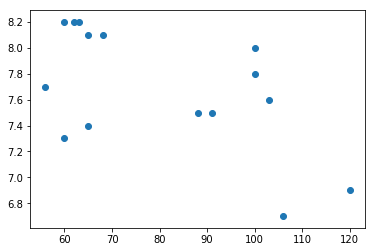

In [17]:
plt.scatter(five.episodes, five.rating)
plt.show()

In [8]:
def genre_id(genre):
    if "Animation" in genre:
        return 2
    if "Action" in genre and "Adventure" in genre:
        return 0
    if "Comedy" in genre and "Drama" in genre:
        return 1
    if "Comedy" in genre:
        return 3
    if "Crime" in genre and "Drama" in genre:
        return 4
    if "Fantasy" in genre or "Sci" in genre:
        return 5
    if "Drama" in genre:
        return 6
    return -1

In [9]:
genre_key = []
for x in df1.genres:
    genre_key.append(genre_id(x))
    
df1["genre_id"] = genre_key
df1

,tv_id,rating,seasons,episodes,popularity,genres,genre_id
show,,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/,3
That '70s Show,52,7.3,8,200,27.289507,Comedy/,3
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/,1
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/,1
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/,0
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/,2
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...,0
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/,3


Here we group genres together better, because the original collected data had too many variations of similar genres

In [10]:
model = sm.OLS.from_formula('rating ~ seasons + genre_id + popularity + popularity * seasons * genre_id', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.287
Date:                Thu, 14 Dec 2017   Prob (F-statistic):            0.00460
Time:                        03:58:16   Log-Likelihood:                -55.514
No. Observations:                  75   AIC:                             127.0
Df Residuals:                      67   BIC:                             145.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.8449      0.525     14.957      0.000       6.798       8.892
seasons                        -0.0280      0.072     -0.390      0.698      -0.172       0.115
genre_id                        0.0531      0.200      0.266      0.791      -0.346       0.452
popularity                     -0.0090      0.009     -1.001      0.321      -0.027       0.009
popularity:seasons              0.0008      0.001      0.705      0.483      -0.001       0.003
popularity:genre_id             0.0017      0.005      0.374      0.710      -0.007       0.011
seasons:genre_id               -0.0059      0.027     -0.220      0.827      -0.059       0.048
popularity:seasons:genre_id    -0.0003      0.001     -0.529      0.598      -0.001       0.001
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.410
Skew:                          -0.557   Prob(JB):                        0.110
Kurtosis:                       2.587   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predict a tv shows rating as a function of the number of seasons, its genre, and popularity

In [11]:
ols_predict = results.fittedvalues
df1["predicted_rating"] = ols_predict
df1

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating
show,,,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/,3,6.750459
That '70s Show,52,7.3,8,200,27.289507,Comedy/,3,7.525510
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/,1,7.583618
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/,1,7.567429
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/,0,7.623380
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/,2,7.549564
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...,0,7.507846
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/,3,7.458649


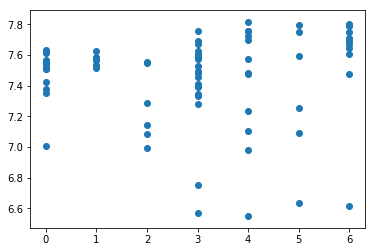

In [12]:
plt.scatter(df1.genre_id, df1.predicted_rating)
plt.show()

In [13]:
df1['ols_residuals'] = df1['rating'] - df1['predicted_rating']
df1

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating,ols_residuals
show,,,,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/,3,6.750459,0.749541
That '70s Show,52,7.3,8,200,27.289507,Comedy/,3,7.525510,-0.225510
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/,1,7.583618,0.416382
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/,1,7.567429,-0.467429
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/,0,7.623380,-0.223380
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866,0.110134
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/,2,7.549564,0.450436
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...,0,7.507846,0.692154
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/,3,7.458649,-0.058649


In [14]:
model = sm.OLS.from_formula('seasons ~ rating + genre_id + popularity + popularity * rating * genre_id', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seasons   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.785
Date:                Thu, 14 Dec 2017   Prob (F-statistic):            0.00162
Time:                        04:29:53   Log-Likelihood:                -209.09
No. Observations:                  75   AIC:                             434.2
Df Residuals:                      67   BIC:                             452.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     36.0550     32.413      1.112      0.270     -28.641     100.751
rating                        -3.7913      4.285     -0.885      0.379     -12.344       4.761
genre_id                      -2.3662      9.139     -0.259      0.796     -20.607      15.875
popularity                    -0.3411      0.558     -0.611      0.543      -1.455       0.773
popularity:rating              0.0488      0.075      0.648      0.519      -0.102       0.199
popularity:genre_id            0.0656      0.172      0.381      0.704      -0.278       0.409
rating:genre_id                0.2466      1.204      0.205      0.838      -2.157       2.651
popularity:rating:genre_id    -0.0067      0.023     -0.286      0.776      -0.053       0.040
==============================================================================
Omnibus:                       40.833   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.317
Skew:                           1.756   Prob(JB):                     2.03e-26
Kurtosis:                       8.053   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ols_predict = results.fittedvalues
df1["predicted_seasons"] = ols_predict
df1

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating,ols_residuals,predicted_seasons
show,,,,,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/,3,6.750459,0.749541,8.453809
That '70s Show,52,7.3,8,200,27.289507,Comedy/,3,7.525510,-0.225510,8.465755
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/,1,7.583618,0.416382,6.595649
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/,1,7.567429,-0.467429,8.951229
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/,0,7.623380,-0.223380,8.366738
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866,0.110134,13.803118
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/,2,7.549564,0.450436,7.239727
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...,0,7.507846,0.692154,7.312743
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/,3,7.458649,-0.058649,8.570389


In [16]:
df1["seasons_residuals"] = df1["seasons"] - df1["predicted_seasons"]
df1

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating,ols_residuals,predicted_seasons,seasons_residuals
show,,,,,,,,,,,
Top Gear,45,7.5,24,176,33.498923,Documentary/Comedy/,3,6.750459,0.749541,8.453809,15.546191
That '70s Show,52,7.3,8,200,27.289507,Comedy/,3,7.525510,-0.225510,8.465755,-0.465755
Buffy the Vampire Slayer,95,8.0,7,144,20.664035,Comedy/Drama/Sci-Fi & Fantasy/,1,7.583618,0.416382,6.595649,0.404351
Weeds,186,7.1,8,102,18.432312,Drama/Comedy/,1,7.567429,-0.467429,8.951229,-0.951229
Star Trek: Enterprise,314,7.4,4,98,18.592752,Action & Adventure/Drama/Sci-Fi & Fantasy/,0,7.623380,-0.223380,8.366738,-4.366738
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866,0.110134,13.803118,15.196882
Futurama,615,8.0,7,124,31.383034,Animation/Comedy/Drama/Sci-Fi & Fantasy/,2,7.549564,0.450436,7.239727,-0.239727
Star Trek: The Next Generation,655,8.2,7,178,39.926478,Action & Adventure/Drama/Mystery/Sci-Fi & Fant...,0,7.507846,0.692154,7.312743,-0.312743
How I Met Your Mother,1100,7.4,9,208,32.145424,Comedy/,3,7.458649,-0.058649,8.570389,0.429611


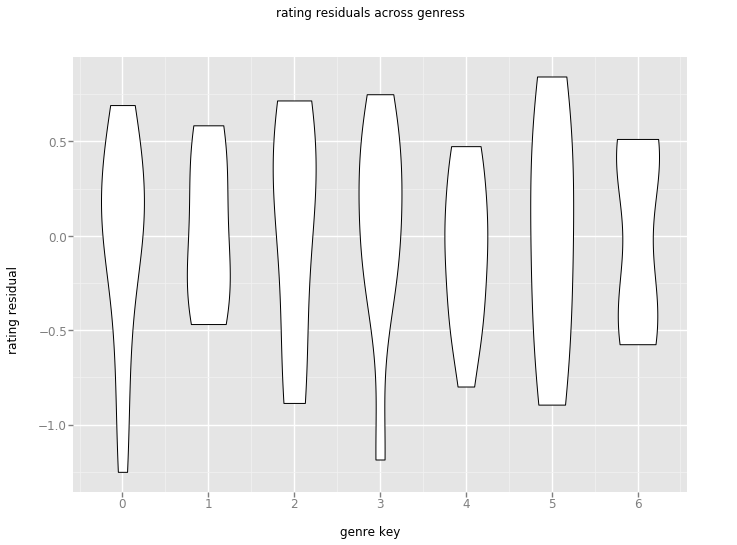

<ggplot: (-9223363306193571093)>

In [18]:
ggplot(aes(x='genre_id', y='ols_residuals'), data=df1) +\
    geom_violin() +\
    labs(title="rating residuals across genres",
         x = "genre key",
         y = "rating residual")

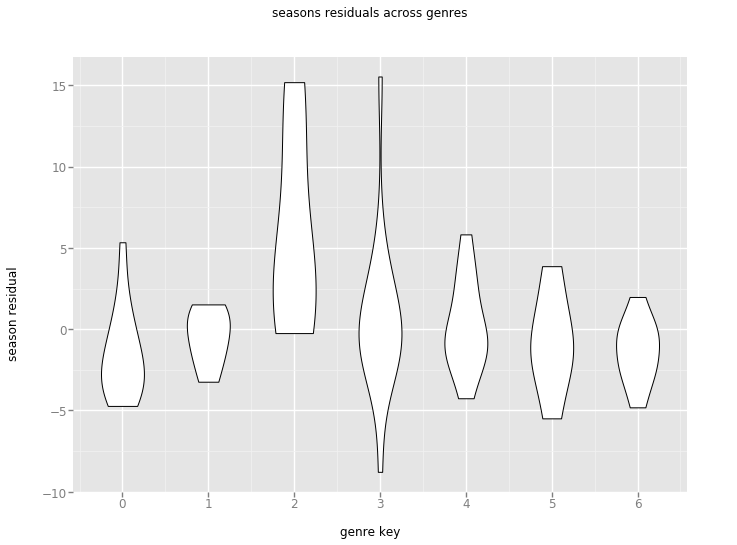

<ggplot: (-9223363306194127349)>

In [20]:
ggplot(aes(x='genre_id', y='seasons_residuals'), data=df1) +\
    geom_violin() +\
    labs(title="seasons residuals across genres",
         x = "genre key",
         y = "season residual")

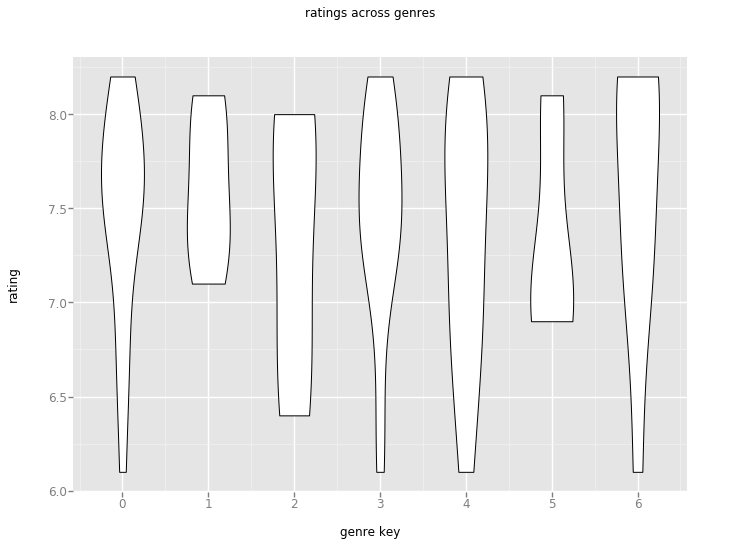

<ggplot: (-9223363306193620399)>

In [23]:
ggplot(aes(x='genre_id', y='rating'), data=df1) +\
    geom_violin() +\
    labs(title="ratings across genres",
         x = "genre key",
         y = "rating")

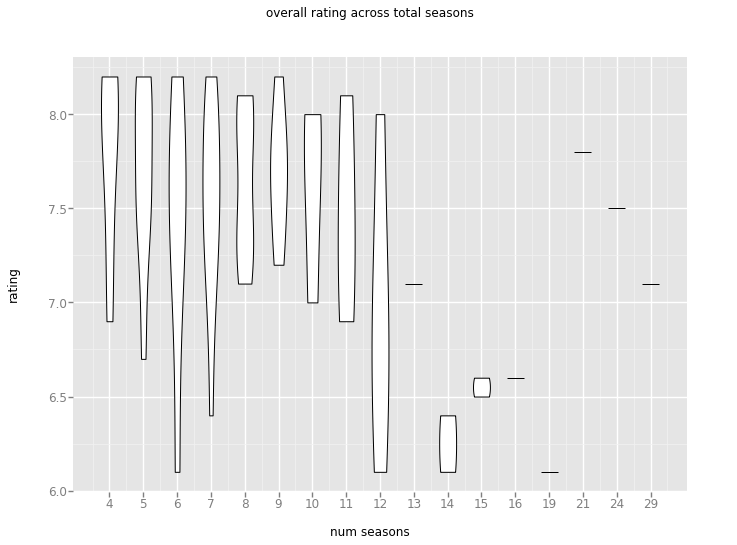

<ggplot: (-9223363306193627504)>

In [24]:
ggplot(aes(x='seasons', y='rating'), data=df1) +\
    geom_violin() +\
    labs(title="overall rating across total seasons",
         x = "num seasons",
         y = "rating")

Let's see if our model of predicted seasons has any weight against individual seasons averages

In [28]:
simpsons = df1[df1["tv_id"] == 456]

In [29]:
simpsons

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating,ols_residuals,predicted_seasons,seasons_residuals
show,,,,,,,,,,,
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866,0.110134,13.803118,15.196882


In [31]:
for x in range(1,30):
    season = tmdb.TV_Seasons(456, x)
    time.sleep(.251)
    info = season.info()

    try:
        curr = 0
        episodes = info.get("episodes")
        num = 0
        for ep in episodes:
            if ep.get("vote_count") > 0:
                curr += ep.get("vote_average")
                num += 1
        avg = curr / num
        key = "season" + str(x)
        simpsons[key] = avg
    except:
        pass

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
simpsons

,tv_id,rating,seasons,episodes,popularity,genres,genre_id,predicted_rating,ols_residuals,predicted_seasons,...,season20,season21,season22,season23,season24,season25,season26,season27,season28,season29
show,,,,,,,,,,,,,,,,,,,,,
The Simpsons,456,7.1,29,688,142.196713,Animation/Comedy/,2,6.989866,0.110134,13.803118,...,7.058714,6.130391,6.890182,6.822,6.492409,6.924909,6.865864,6.874136,6.206409,5.75


In [34]:
x = []
y = []
for i in range(1,30):
    x.append(i)
    key = "season" + str(i)
    y.append(simpsons[key][0])

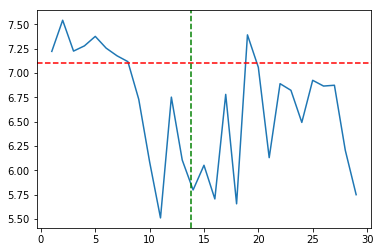

In [50]:
plt.plot(x,y)
#rating = np.array( [simpsons["rating"] for i in range(len(x))] )
plt.axhline(y=simpsons["rating"][0], color='r', linestyle='--')
plt.axvline(x=simpsons["predicted_seasons"][0], color='g', linestyle='--')
plt.show()

Season 13/14 of the simpsons certainly was a relative low for the show, maybe it stayed past it's welcome